##Data602 Capstone project Deliverable II 

##Import necessary library 

In [37]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
import tensorflow as tf
from tensorflow import keras
import os
import torch
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler



In [38]:

data_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Time and sum ought to be scaled as different segments. Then again, we have to likewise make a subtest of the data frame so as to have an equivalent measure of Fraud and Non-Fraud cases, helping our calculations better comprehend designs that decides if an exchange is a misrepresentation or not.

# The shape of the data

 The shape of the distribution can assist with identifying other descriptive statistics, such as which measure of central tendency is appropriate to use. If the data are normally distributed, the mean, median and mode are all equal, and therefore are all appropriate measure of centre central tendency

In [39]:
data_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#Test  the class label variance

In [40]:
neg, pos = np.bincount(data_df['Class'])
total = neg + pos
print('Samples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Samples:
    Total: 284807
    Positive: 492 (0.17% of total)



Its helps to know Imbalanced classification is the problem of classification when there is an unequal distribution of classes in the training datasetLet's look at the dataset imbalance:

#Clean, split and normalize the data

In [41]:
cleaned_df = data_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps=0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

#Data Exploration
This step it can help to find out missing value and also, cut down your massive data set to a manageable size where you can focus your efforts on analyzing the most relevant data.

In [42]:
data_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [43]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

work is utilized to get a compact rundown of the dataframe. It comes extremely helpful while doing exploratory investigation of the information. To get a brisk diagram of the dataset we utilize the dataframe.info() work.

In [44]:
data_df.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


The previous step helps us to detect missing values. It return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy. NaN, gets mapped to True values.

In [45]:
anonymous_feaures = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
time = ['Time']
amount = ['Amount']
fraud_non_fraud = ['Class']
inputs = anonymous_feaures + amount
outputs = fraud_non_fraud

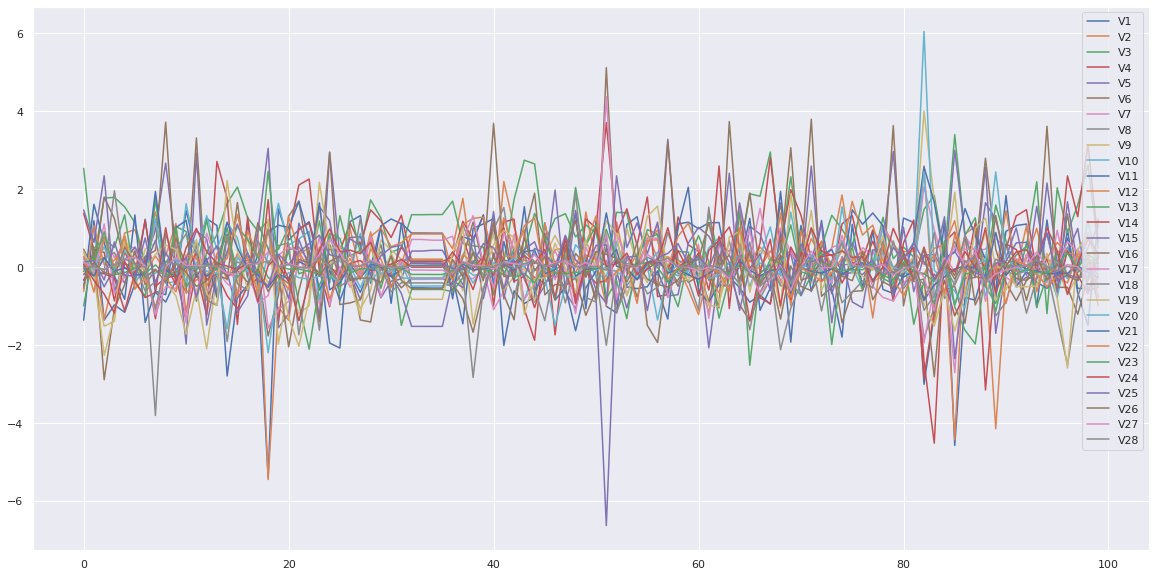

In [46]:
sns.set()
data_df[anonymous_feaures].iloc[0:100].plot(figsize=(20, 10))
plt.show()

# How many Credit card fraud or Not
 The compromise can occur in a number of ways and can usually occur without the knowledge of the cardholder.

#Froud credit card show by Visualization
pd.value_counts(data_df['Class']).plot.bar()
plt.title('Fraud class of credit Area Charts')
plt.xlabel('Class')
plt.ylabel('Frequency')
raw_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

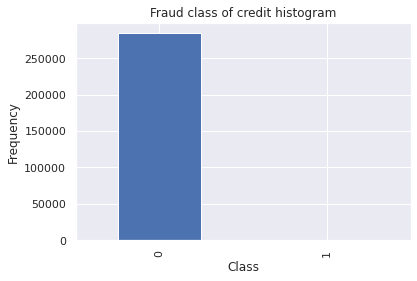

In [47]:
#Froud credit card show by Visualization
pd.value_counts(data_df['Class']).plot.bar()
plt.title('Fraud class of credit histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data_df['Class'].value_counts()

Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!



# This is formatted as code



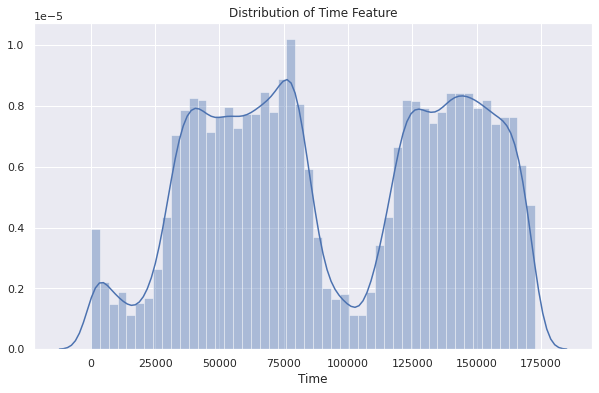

In [48]:
#visualizations of time and amount

plt.figure(figsize=(10,6))
plt.title('Distribution of Time Feature')
sns.distplot(data_df.Time)



The conveyances we can have a thought of how slanted are these highlights, we can likewise observe further dissemination of different highlights. There are strategies that can enable the dissemination to be less slanted which to will be actualized in this scratchpad later on.

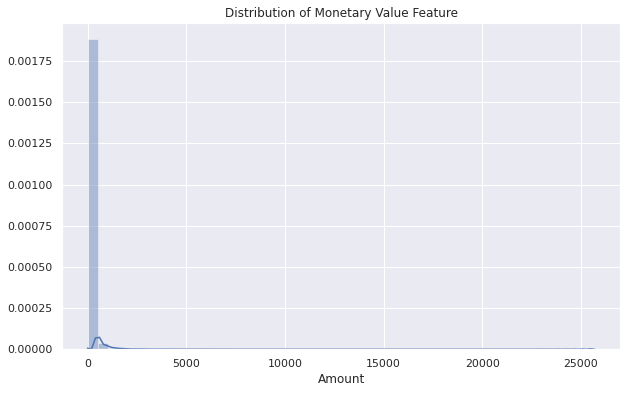

In [49]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(data_df.Amount)


By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation. Now let us take a sample of the dataset for out modelling and prediction

In [50]:


# Lets shuffle the data before creating the subsamples

df = data_df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
184096,126088.0,2.136970,0.306858,-2.747343,0.252811,0.953139,-1.457830,0.749253,-0.468988,0.035017,-0.263242,-0.604065,-0.611314,-0.852993,-0.341497,0.493823,0.102736,0.633937,0.036234,-0.092322,-0.189702,0.033022,0.136739,-0.012377,0.529004,0.321499,0.777043,-0.126375,-0.054180,10.00,0
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,-0.448794,-2.562602,0.243483,-1.181669,0.004373,-2.302596,-4.446192,-1.710463,0.982729,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1
142430,84711.0,1.293053,0.457969,-1.940450,0.173149,2.609570,3.014117,-0.269415,0.754420,-0.221009,-0.620800,0.348748,-0.296105,-0.118736,-1.192582,1.278393,0.923268,0.395379,1.039038,-0.252924,0.025020,-0.121126,-0.427753,-0.159336,0.857135,0.850055,-0.311685,0.037536,0.050618,1.00,0
44091,41791.0,-7.222731,6.155773,-10.826460,4.180779,-6.123555,-3.114136,-6.895112,5.161516,-2.516477,-6.403371,3.186058,-6.855571,-0.837723,-8.036615,0.956970,-4.557193,-7.654704,-2.588419,0.718555,0.818859,0.912700,-0.630358,0.190887,-0.061263,0.379775,-0.266845,1.193695,0.257468,99.99,1
42609,41170.0,-6.498086,4.750515,-8.966558,7.098854,-6.958376,-2.822126,-10.333406,4.031907,-6.648778,-11.634414,6.877571,-13.697686,0.463040,-13.044182,-0.309229,-12.317580,-24.019099,-9.335193,1.951890,0.568338,2.158143,0.111510,0.216414,0.584661,0.760360,0.081972,1.415068,0.035124,83.38,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


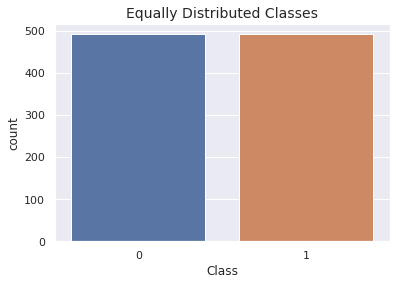

In [51]:
import seaborn as sns
from matplotlib import pyplot as plt

print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))
sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

 To create our balanced training data set, I took all of the fraudulent transactions in our data set and counted them. Then, I randomly selected the same number of non-fraudulent transactions and concatenated the two. After shuffling this newly created data set, I decided to output the class distributions once more to visualize the difference. 
 
 We use seaborn in combination with matplotlib, the Python plotting module.
A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.

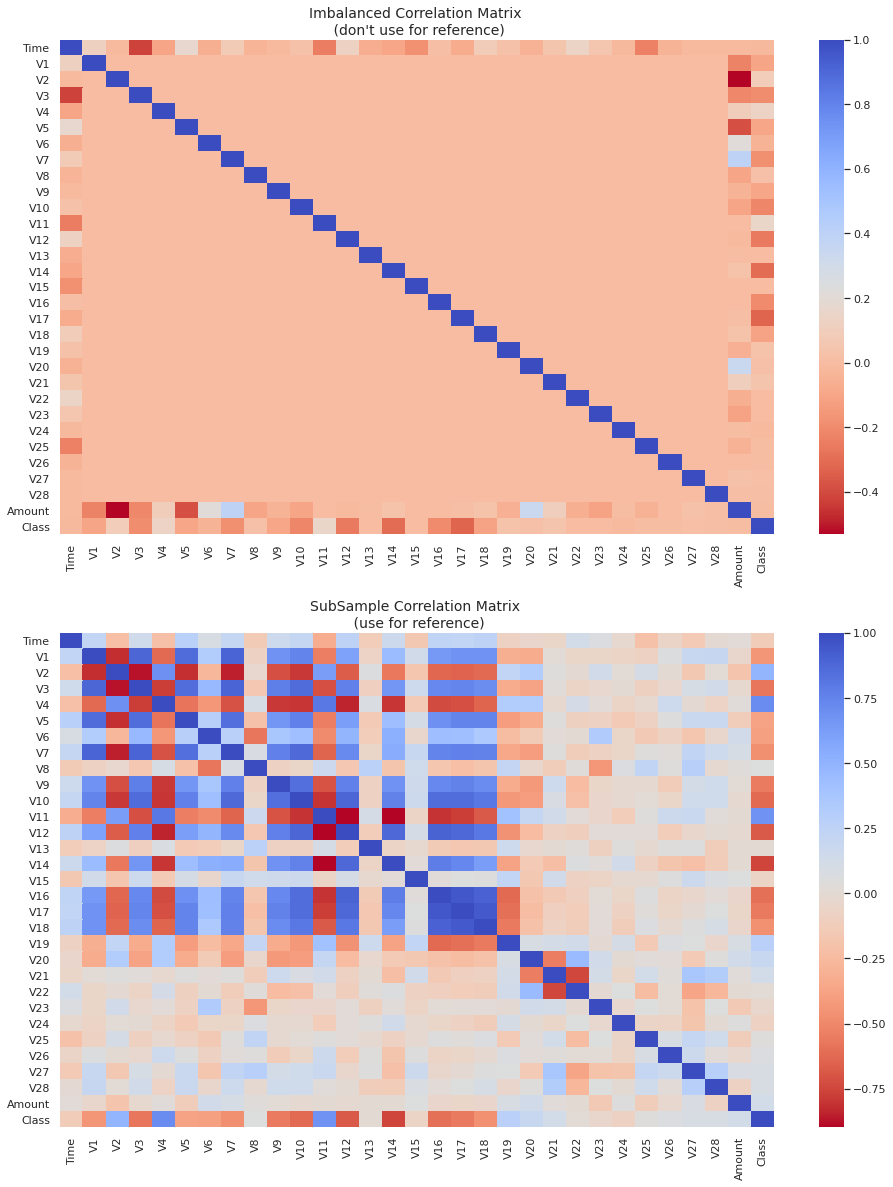

In [52]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))

# Entire DataFrame (to show how the correlation looks like in an imbalanced dataset)
corr = df.corr() # calculate correlation between features
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# Subsampled DataFrame
sub_sample_corr = new_df.corr() # calculate correlation between features
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title("SubSample Correlation Matrix \n (use for reference)", fontsize=14)
plt.show()

While these correlations are high, I don't expect it to run the risk of multicollinearity.

The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

In [53]:
sol = (sub_sample_corr.where(np.triu(np.ones(sub_sample_corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

print(sol[0:9])
print(sol[-9:-1])

V16  V17    0.949835
V17  V18    0.937880
V16  V18    0.908036
V12  V16    0.900059
V1   V7     0.893249
V3   V7     0.891025
V10  V12    0.883843
V1   V3     0.883421
V12  V14    0.881335
dtype: float64
V10  V11   -0.803754
V11  V16   -0.806999
V2   V5    -0.810686
V1   V2    -0.820455
V4   V12   -0.840879
V2   V7    -0.851495
     V3    -0.874341
V11  V14   -0.893844
dtype: float64


In [54]:
print(sub_sample_corr['Class'].sort_values(ascending=False))

Class     1.000000
V4        0.716194
V11       0.681940
V2        0.493893
V19       0.274530
V20       0.194224
V21       0.130387
Amount    0.128490
V27       0.094202
V28       0.089433
V26       0.066917
V8        0.055162
V25       0.039893
V22       0.008011
V13       0.001440
V23      -0.031147
V15      -0.061023
V24      -0.078113
Time     -0.130875
V5       -0.377045
V6       -0.390460
V1       -0.441797
V18      -0.465625
V7       -0.473719
V9       -0.551313
V17      -0.561156
V3       -0.574970
V16      -0.595699
V10      -0.625551
V12      -0.681175
V14      -0.751165
Name: Class, dtype: float64


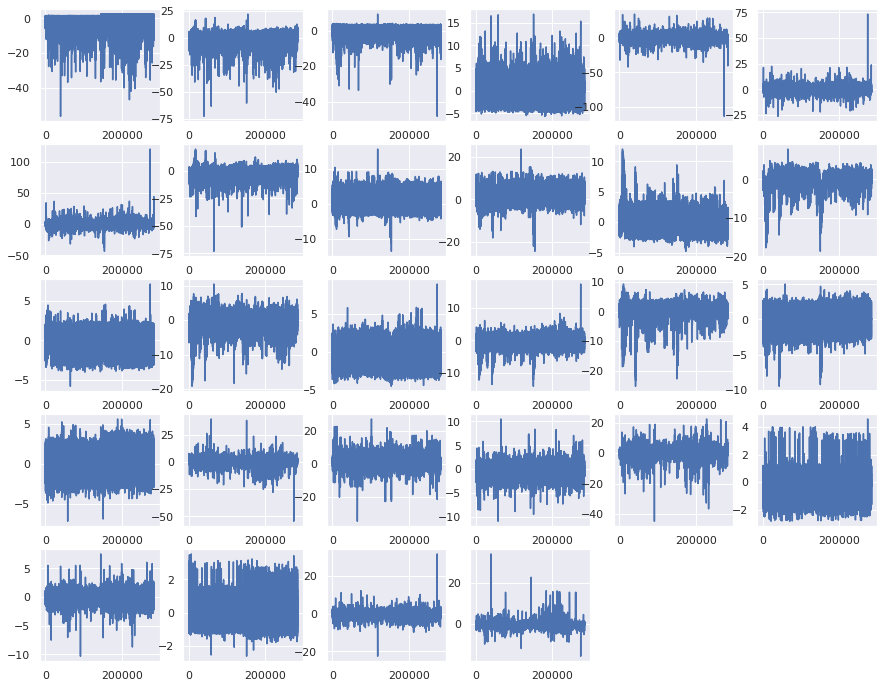

In [55]:
##Plotting the variables using subplots
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(data_df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(data_df.V15)
plt.subplot(5, 6, 2) ; plt.plot(data_df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(data_df.V16)
plt.subplot(5, 6, 3) ; plt.plot(data_df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(data_df.V17)
plt.subplot(5, 6, 4) ; plt.plot(data_df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(data_df.V18)
plt.subplot(5, 6, 5) ; plt.plot(data_df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(data_df.V19)
plt.subplot(5, 6, 6) ; plt.plot(data_df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(data_df.V20)
plt.subplot(5, 6, 7) ; plt.plot(data_df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(data_df.V21)
plt.subplot(5, 6, 8) ; plt.plot(data_df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(data_df.V22)
plt.subplot(5, 6, 9) ; plt.plot(data_df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(data_df.V23)
plt.subplot(5, 6, 10) ; plt.plot(data_df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(data_df.V24)
plt.subplot(5, 6, 11) ; plt.plot(data_df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(data_df.V25)
plt.subplot(5, 6, 12) ; plt.plot(data_df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(data_df.V26)
plt.subplot(5, 6, 13) ; plt.plot(data_df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(data_df.V27)
plt.subplot(5, 6, 14) ; plt.plot(data_df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(data_df.V28)

plt.show()

The techniques used to communicate insights from data through visual representation. Its main goal is to distill large datasets into visual graphics to allow for easy understanding of complex relationships within the data.

## Data Pre-processing

In [56]:
#Standardization/ Scaling/ Normalization/Scaling and Distributing
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_df['normalizedAmount'] = std.fit_transform(data_df['Amount'].values.reshape(-1,1))
data_df = data_df.drop(['Amount'], axis = 1)

Presently after decrease that information we can check the significant parameters that could impact our model. We can comprehend that utilizing better representation, for example, heatmap plots.

In [57]:
#After Standardization
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


The way toward putting various factors on a similar scale. This procedure permits you to analyze scores between various kinds of factors.

In [58]:
#Time column Delete
data_df = data_df.drop(['Time'], axis = 1)
data_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Regularly, to normalize factors, you figure the mean and standard deviation for a variable.s.

In [59]:
X = data_df.iloc[:, data_df.columns != 'Class'].values
y = data_df.iloc[:, data_df.columns == 'Class'].values
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807, 1)


As it can be seen, rows x columns from .shape is equal to the value returned by .size
Also

In [60]:
#Data Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.

In [61]:
!pip install imblearn

In [62]:
#SMOTE techniques using (to handle imbalanced data we use)
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


Destroyed combines new minority occurrences between existing minority
. It produces the virtual preparing records by straight introduction for the minority class. These manufactured preparing records are created by haphazardly choosing at least one of the k-closest neighbors for every model in the minority class.

In [63]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


Destroyed Algorithm has over examined the minority occurrences and made it equivalent to greater part class. The two classifications have equivalent measure of records. All the more explicitly, the minority class has been expanded to the all out number of dominant part class. 


In [64]:
#Data Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

Function allows you to break a dataset with ease while pursuing an ideal model. Also, keep in mind that your model should not be overfitting or underfitting.

In [65]:
#Train data size after split
X_train.shape

(199364, 29)

In [66]:
#Test data size after split
X_test.shape

(85443, 29)

## Train the model by using Logistic Regression

In [67]:
# create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

This work permits you to break a dataset easily while seeking after a perfect model. Likewise, remember that your model ought not be overfitting or underfitting.

In [68]:
import sklearn
print(sklearn.__version__)




0.22.2.post1


In [69]:
# fit a logistic regression model to the data
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

We make preparing and test sets to ensure that after we train our grouping calculation, it can sum up well to new information.

In [70]:
# obtain model predictions
predicted = model.predict(X_test) 
# predict probabilities
probs = model.predict_proba(X_test)
# print the accuracy score
print("Accuracy Score: {}".format(accuracy_score(y_test, predicted)))

Accuracy Score: 0.999204147794436


At this steps weMake predictions on entire test data and A class expectation is given the settled model and at least one information cases, anticipate the class for the information occurrences.

In [71]:
# print the ROC score
print("ROC score: {}\n".format(roc_auc_score(y_test, probs[:,1])))

# print the classifcation report and confusion matrix
print("Classification report:\n{}\n".format(classification_report(y_test, predicted)))

# print confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print("Confusion matrix:\n{}\n".format(conf_mat))

ROC score: 0.9693792213940537

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
[[85284    12]
 [   56    91]]

